# 13주차

A, B 2인의 가위바위보 후 내기금액을 이긴 사람에게 지급하는 게임을 블록체인에 개발하세요.

게임 컨트랙은 Rsp, 구현할 함수는 다음과 같다. 그 외 필요로 하는 함수는 추가할 수 있다.



함수 | 설명

-----|-----

setA | 직접 입력하지 않고, 가위, 바위, 보를 무작위로 생성하여 내고 ```1000 wei```를 베팅한다.

setB | 게임 플레이어가 직접 입력하고, ```1000 wei```를 베팅한다.

play | setA, setB 입력이 끝나고 컴퓨터가 실행하는 것으로 하고, 승패가 결정짓는다.

distributeBetAmount | 승패에 따라 분배한다. 승자가 패자의 내기 금액 ```1000 wei```를 가지게 된다.

getMatchResult() | 누가 이겼는지 A, B 승자를 포함한 문자열 "A wins", "B wins", "tie" 결과를 출력한다.



노드에서 게임을 다음과 같이 진행하세요.

- 게임 전의 A잔고, B잔고, 컨트랙 잔고 출력 (컨트랙 상의 잔고를 말한다)

- setA() 실행. 플레이어 A는 컴퓨터가 대행하는 것으로 하고, 내기금액 걸고 가위바위보 중 하나를 무작위로 선택

- setB() 실행. B는 자신이 직접 내기금액 걸고, 가위바위보 중 하나를 선택하여 입력

- play() 실행해서, 승부를 결정

- getMatchResult() 실행해서, 승부의 결과를 출력

- 게임 끝나고 A잔고, B잔고, 컨트랙 잔고 출력 (컨트랙 상의 잔고를 말한다)



In [ ]:
//SPDX-License-Identifier: GPL-3.0-or-later
pragma solidity 0.8.0;
contract Rsp {
    struct Player {
        string name;
        uint BetAMT;
        uint rsp;
    }
    int256 result = 0;
    mapping(address=>Player) PlayerMap;
    mapping(address=>uint) BalanceOf;
    mapping(string=>address) addressByName;
    
    address payable owner;
    address A;
    address B;
    uint balance;
    constructor() {
        owner = payable(msg.sender);
    }
    
    function setA() public { 
        uint _rsp = uint8(uint256(keccak256(abi.encodePacked(block.timestamp, block.difficulty)))%3);
        Player memory a = Player("Player_A", 1000, _rsp);
        PlayerMap[A] = a;
    }
    
    function setB (uint batting, uint _rsp) public {
        Player memory b = Player("Player_B", 1000, _rsp);
        PlayerMap[B] = b;
    }
    
    function Play() public {
        //0:가위, 1:바위, 2:보
        string  memory nameA = "Player_A";
        string  memory nameB = "Player_B";
        Player memory a = PlayerMap[addressByName[nameA]];
        Player memory b = PlayerMap[addressByName[nameB]];
        uint rand_a = a.rsp;
        uint rand_b = b.rsp;
        if(a == b) {
            result = result;
        } else if ((a==0&&b==1)||(a==1&&b==2)||(a==2&&b==0)){
            result = 1;
        } else{
            result = 2;
        }
    }
    function getMatchResult() public view returns (string memory){
        if(result==1){
            return("A wins");
        } else if(result==2){
            return("B wins");
        } else{
            return("tie");
        }
    }
    function getBalance() public view returns(uint, uint, uint) {
        return ( BalanceOf[A], BalanceOf[B], BalanceOf[address(this)]);
    }
    
    modifier onlyOwner {
        require(msg.sender == owner);
        _;
    }
}
    

In [1]:
from IPython.display import Image

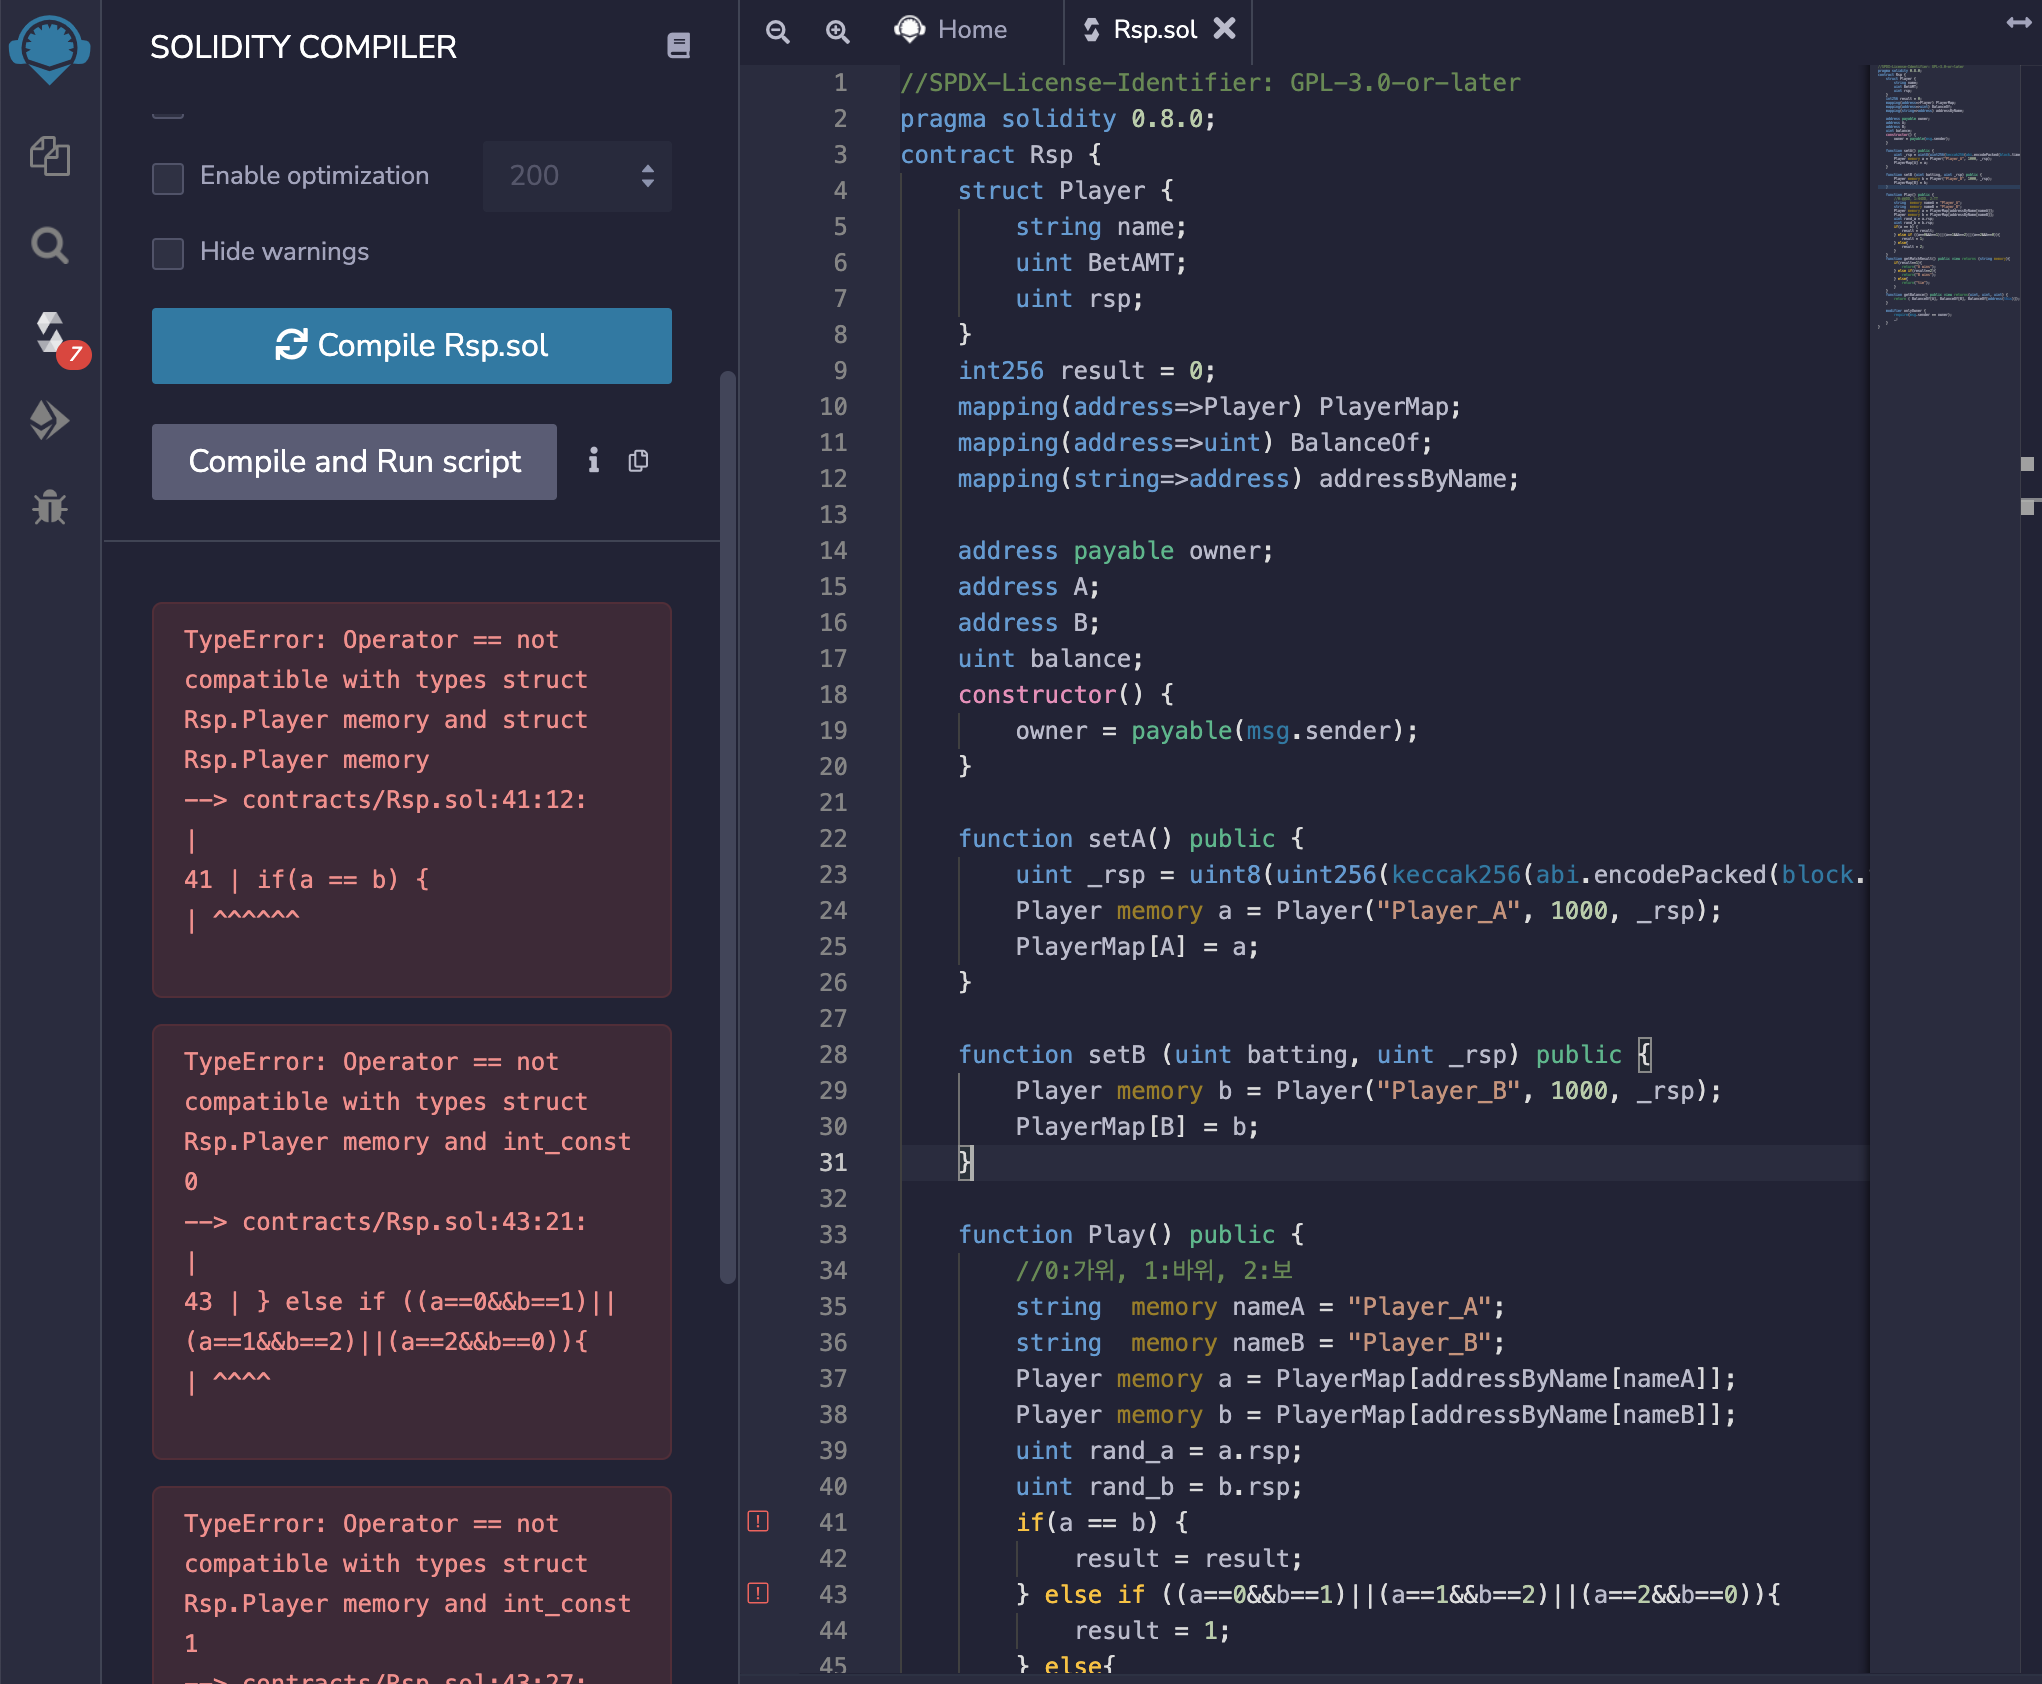

In [3]:
Image("/Users/anjaeu/Desktop/error.png")

* 리믹스에서 실행하였더니 operator에러가 나서 여기서부터 더 진행하지 못하였습니다!
* 이번 과제는 미흡했습니다. 죄송합니다.